In [75]:
import numpy as np

import random

import networkx as nx

import math
# Affichage graphique

#%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline





import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.cm import ScalarMappable

import time

import networkx as nx


from ipywidgets import interact, fixed
import ipywidgets as widgets

plt.rcParams["figure.figsize"] = [12, 12]

rng = np.random.default_rng(12345)

np.set_printoptions(precision=3)
np.set_printoptions(linewidth=200)
np.set_printoptions(suppress=True)

# <center>R5.A.11 - Méthodes d'optimisation <br> TP2a -- Applications du simplexe</center>


-------------
 <center>      <i> Tom Ferragut, Thibault Godin </i> <br> <i>IUT de Vannes, BUT Informatique </i> </center>



-------------

Le but de ce TP est de proposer plusieurs applications de la méthode du simplexe, en particulier une autre méthode de résolution du problème du flot maximal, vu en R5.A.12 (avec résolution par Edmond-Karp / Ford-Fulferson), en transformant ce problème en un problème d'optimisation linéaire.

In [76]:
from scipy.optimize import linprog

## Résolution avec Scipy

La bibliothèque standard pour le calcul scientifique en python est scipy, qui possède une [fonction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) assez souple et puissante de résolution des problèmes d'optimisation linéaire.

On reprend l'exemple du manuel : 


$$\begin{split}\min_{x_0, x_1} \ -x_0 + 4x_1 & \\
\mbox{sous contraintes} \ -3x_0 + x_1 & \leq 6,\\
-x_0 - 2x_1 & \geq -4,\\
x_1& \geq -3.\end{split}$$

>**_question_**<br>
Représenter (à la main) ce problème en 2d et le résoudre part la méthode graphique (attention aux sens des inéquations et des contraintes. <br>
Mettre ce problème sous forme standard (avec uniquement des $\leq$)

In [1]:
#à la main

Voici la résolution par la bibliothèque Scipy :

In [78]:
c = [-1, 4]

A = [[-3, 1], [1, 2]]

b = [6, 4]

x0_bounds = (None, None)

x1_bounds = (-3, None)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])

print(res.fun,res.x)


-22.0 [10. -3.]


>**_question_**<br>
Reprendre les exemples du CM1 avec `scipy`

In [79]:
#Todo

# Résolution du problème des plus courts chemins avec `scipy.optimize.linprog`


Nous allons résoudre le problème des plus courts chemins à partir d'un sommet donné dans un graphe pondéré (vu en théorie des graphes en BUT1) en utilisant la programmation linéaire avec la fonction `linprog` de `scipy.optimize`. 

Pour rappel, les algorithmes classiques pour ce problème sont **Dijkstra**, **Bellman-Ford** (source unique) ou encore **Floyd-Warshall** (toutes les distances)


La programmation linéaire résout des problèmes sous la forme standard :
\[
\text{Minimiser} \; c^T x \quad \text{sous réserve de} \; A_{ub} x \leq b_{ub}, \; A_{eq} x = b_{eq}, \; x \geq 0
\]



### Variables de décision :
- \(d[i]\) représente la distance la plus courte du sommet source vers le sommet \(i\) depuis un sommet source fixé, $s$.

### Fonction Objectif :
- Nous minimisons les distances calculées, on cherche donc à **maximiser** 
$\sum_{t \in S} d[t]$

### Contraintes :
- Pour chaque arête $ (u,v) $, nous imposons la condition suivante : $ d[v] \leq d[u] + w(u, v) $, ce qui peut être reformulé comme $d[v] - d[u] \leq w(u, v)$. Cela respecte la forme standard $Ax \leq b$.
- Nous fixons également la distance du sommet source à lui-même à 0, soit $d[s] = 0$.

>**_question_**<br>
Dessinez le graphe dont la matrice de pondération est donnée, ci-dessous, puis donner les plus courts chemins depuis le sommet $0$

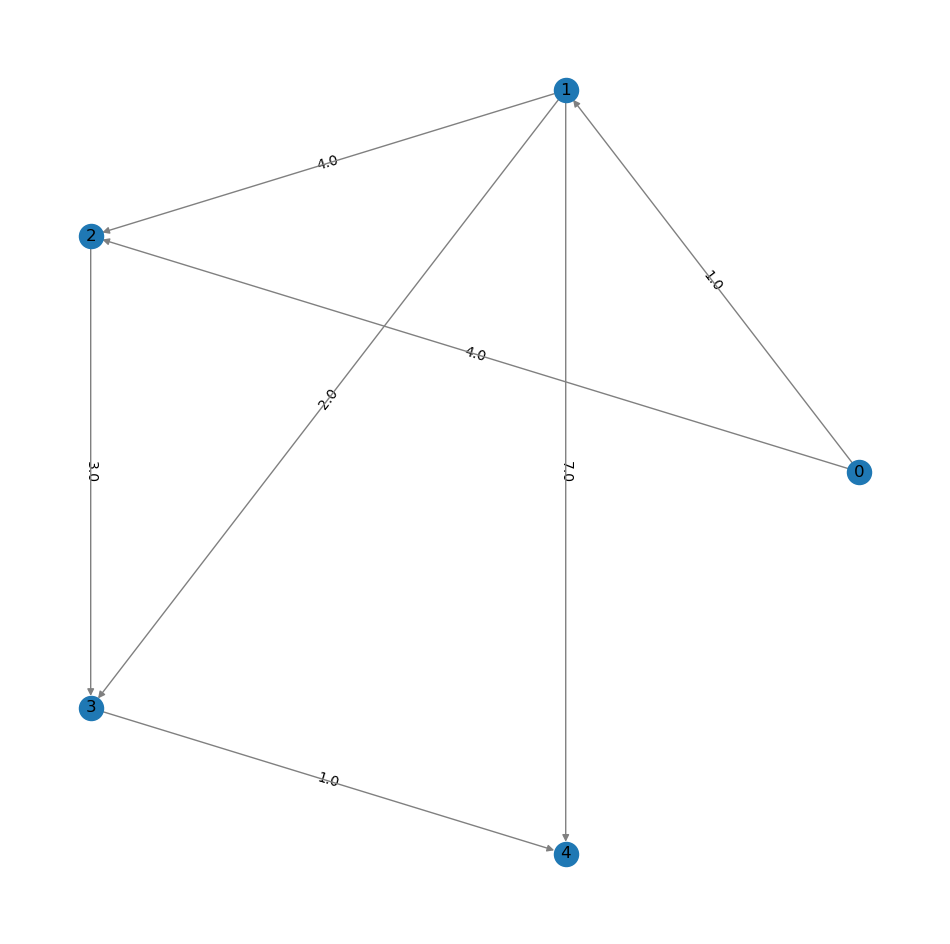

In [80]:
#utilitaires

weight_matrix = np.array([
    [0, 1, 4, np.inf, np.inf],
    [np.inf, 0, 4, 2, 7],
    [np.inf, np.inf, 0, 3, np.inf],
    [np.inf, np.inf, np.inf, 0, 1],
    [np.inf, np.inf, np.inf, np.inf, 0]
])


def ToAdj(W,loop=False):
    """
    Converts a weight matrix to the (most plausible) corresponding adjacency matrix
    
    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: a adjacency matrix
    :rtype: two dimensionnal numpy array
    
    """
    A=np.copy(W)
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if W[i][j]==np.inf:
                A[i][j]=0
            else :
                if W[i][j]==0:
                    if i!=j:
                        A[i][j]=1
                        print("Warning: a weight is equal to 0")
                    else : 
                        if loop :
                            A[i][j]=1
                        else :
                            A[i][j]=0


                else :
                    A[i][j]=1

    return A

W = weight_matrix
A=ToAdj(W)
G=nx.from_numpy_array(A,create_using=nx.DiGraph())

edges = G.edges()



for u,v in G.edges():
    G[u][v]['weight'] = W[u][v]

# Visualization with edge weights
weights = nx.get_edge_attributes(G, 'weight')
pos=nx.circular_layout(G)

# Visualization with edge widths equal to edge weights
#width = [weights[e] for e in G.edges()]
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw(G, pos, edge_color = 'grey',with_labels=True)


>**_question_**<br>
_À la main_, mettre ce problème sous la forme matricielle pour l'optimisation linéaire

>**_question_**<br>
Écrire un programme résolvant le problème des plus courts chemin via optimisation linéaire (on utilisera `linprog` de `scipy`)

In [2]:
def shortest_path_linprog(weight_matrix, source):
   return -1

[[-1.  1.  0.  0.  0.]
 [-1.  0.  1.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0. -1.  0.  0.  1.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0.  0. -1.  1.]] [1. 4. 4. 2. 7. 3. 1.] [[1. 0. 0. 0. 0.]] [0]
Les plus courts chemins à partir du sommet 0 : [-0.  1.  4.  3.  4.]


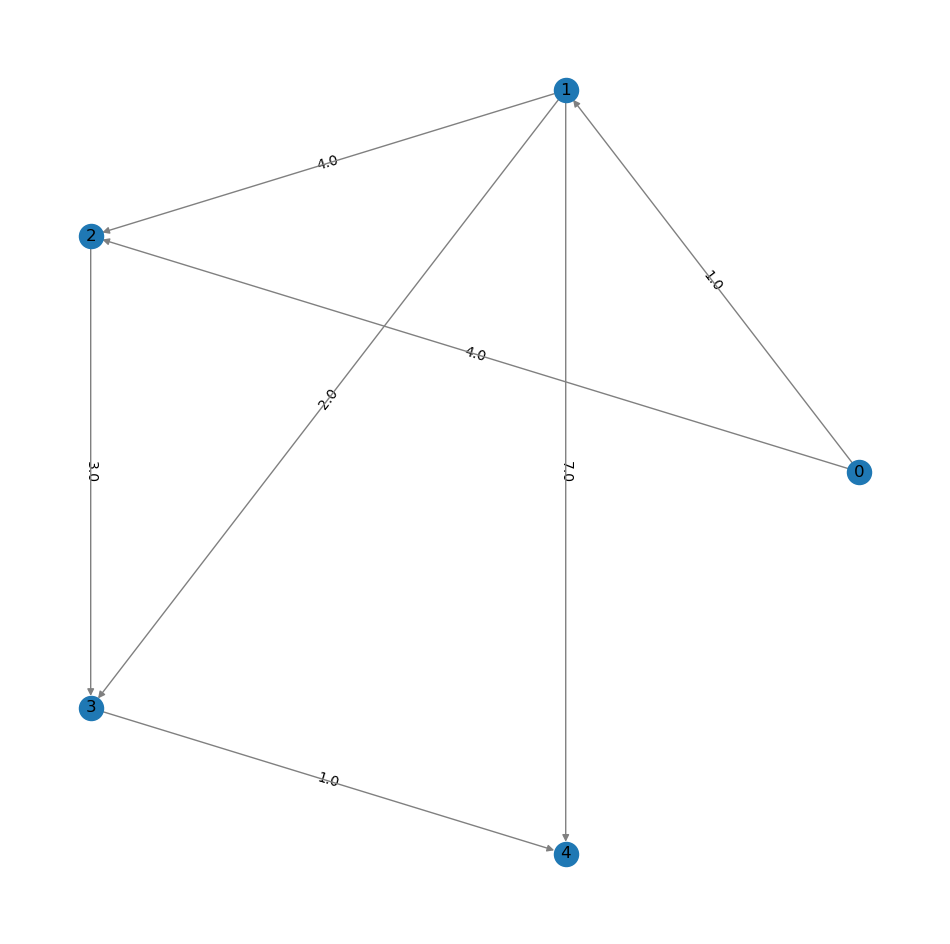

In [82]:
weight_matrix = np.array([
    [0, 1, 4, np.inf, np.inf],
    [np.inf, 0, 4, 2, 7],
    [np.inf, np.inf, 0, 3, np.inf],
    [np.inf, np.inf, np.inf, 0, 1],
    [np.inf, np.inf, np.inf, np.inf, 0]
])

source_vertex = 0
shortest_paths = shortest_path_linprog(weight_matrix, source_vertex)

A=ToAdj(W)
G=nx.from_numpy_array(A,create_using=nx.DiGraph())

edges = G.edges()



for u,v in G.edges():
    G[u][v]['weight'] = W[u][v]

# Visualization with edge weights
weights = nx.get_edge_attributes(G, 'weight')
pos=nx.circular_layout(G)

# Visualization with edge widths equal to edge weights
#width = [weights[e] for e in G.edges()]
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw(G, pos, edge_color = 'grey',with_labels=True)


print("Les plus courts chemins à partir du sommet", source_vertex, ":", shortest_paths)


# Régression linéaire

## Régression linéaire




Le but de cette partie est d'effectuer une **régression linéaire**, c'est-à-dire d'approcher nos données à l'aide d'une fonction affine. Elle s'inspire entre autre de [cette vidéo](https://www.youtube.com/watch?v=HgY4mpKsFFo)

On reprend l'exemple de l'an dernier,  un tableau de taille et poids pour 15 personnes.


**Données :** 

| Id        | Height (cm)           | Weight (kg)  |
| ------------- |:-------------:| -----:|
| 1     | 147 |  49 |
| 2    | 150      |   50 |
|3 | 153      |     51 |
| 4     | 155 |  52 |
| 5    | 158      |   54 |
|6 | 160      |     56 |
| 7     | 163 |  58 |
| 8    | 165      |   59 |
|9 | 168      |     60 |
| 10     | 170 |  62 |
| 11    | 173      |   63 |
|12 | 175      |     64 |
| 13     | 178 |  66 |
| 14    | 180      |   67 |
|15 | 183      |     68 |
|16 | 168      |     58 |


__On voudrait approcher les données au mieux à l'aide d'une droite $y = a . x + b$.__


On va (re)voir deux méthodes, qui diffèrent sur l'approche pratique (type d'optimisation) et théorique (choix du _au mieux_)

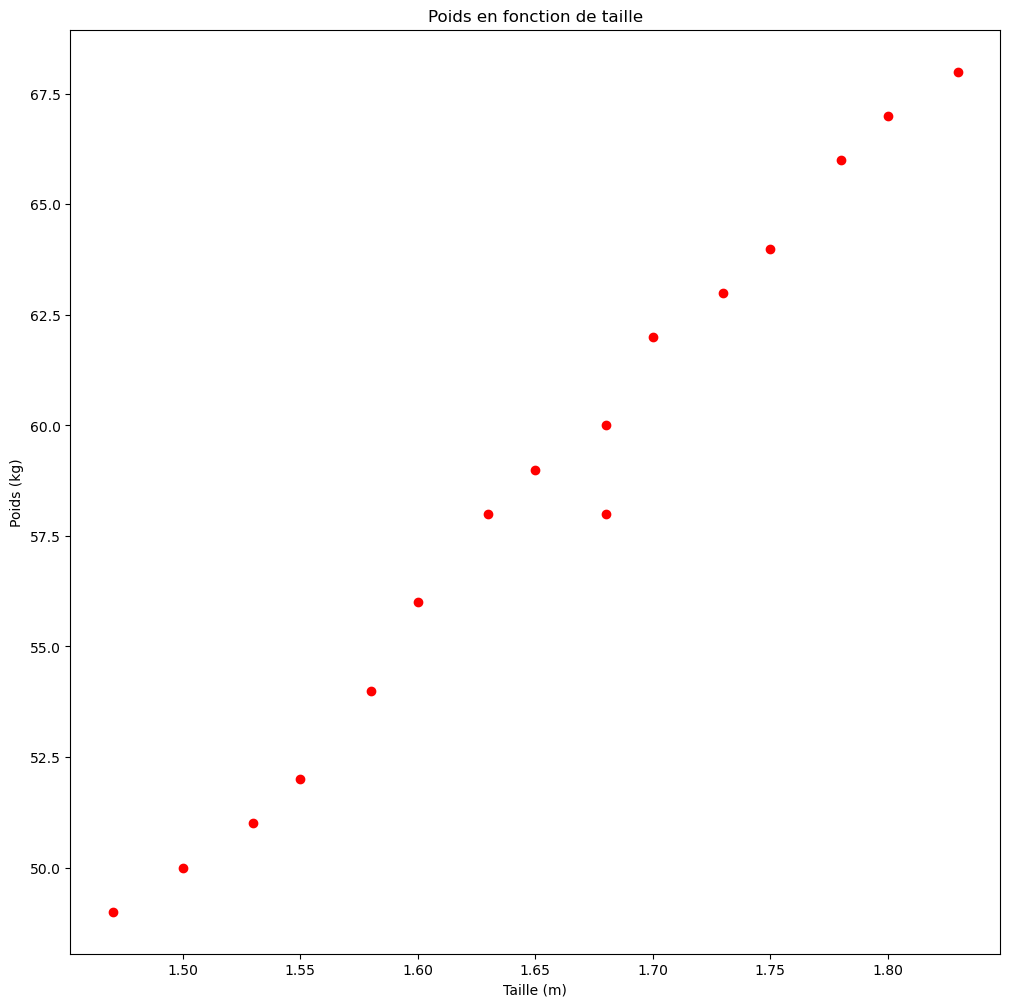

In [83]:
plt.close()

# data
#taille en mètres
x = np.array([1.47, 1.50, 1.53, 1.55, 1.58, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83,1.68]) #Taille
y = np.array([49.,50.,51.,52.,54.,56.,58.,59.,60.,62.,63.,64.,66.,67.,68.,58]) #Poids

#print(X.shape)
#print(y.shape)


# plot the data
plt.scatter(x,y, color='red')
plt.title('Poids en fonction de taille')
plt.xlabel('Taille (m)')
plt.ylabel('Poids (kg)')

plt.show()


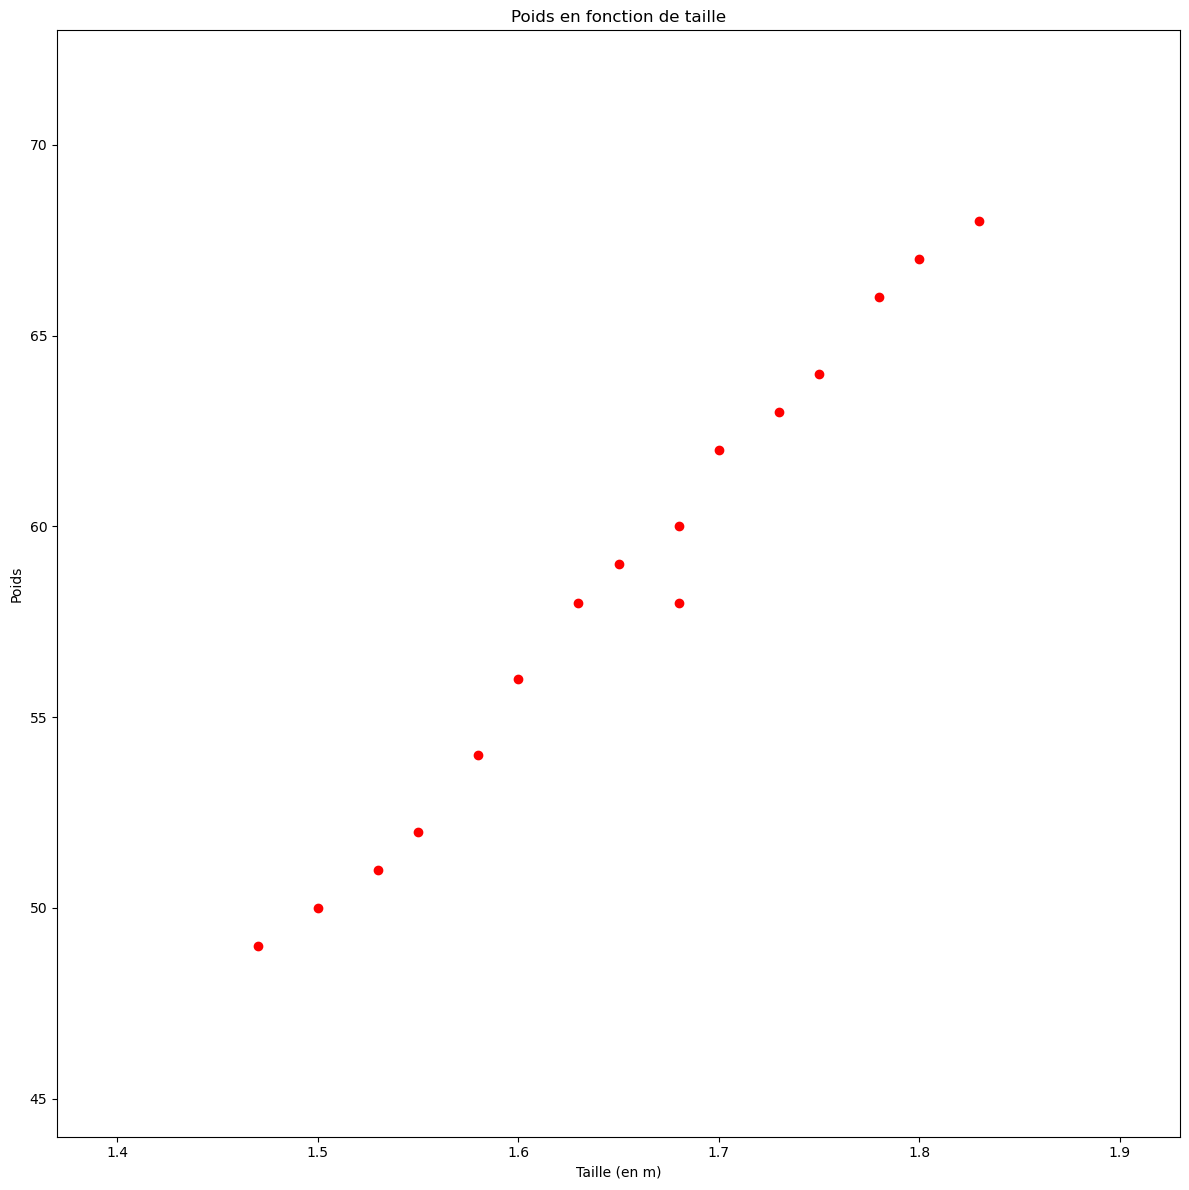

interactive(children=(FloatSlider(value=0.0, description='a', max=80.0, min=-80.0, step=0.5), FloatSlider(valu…

<function __main__.plotDroite(dataX, dataY, a, b)>

In [84]:
def plotDroite(dataX,dataY,a,b):
    
    # Representation des donnees x en fct de y
    plt.scatter(dataX,dataY, color='red')
    plt.title('Poids en fonction de taille')
    plt.xlabel('Taille (en m)')
    plt.ylabel('Poids')
    
    #Representation de la droite y=ax+b
    xinf=np.linspace(min(x)-10,max(x)+10,500)
    yinf=[a*i+b for i in xinf]
    
    plt.plot(xinf,yinf, color='blue')
    plt.ylim(min(y)-5,max(y)+5)
    plt.xlim(min(x)-0.1,max(x)+0.1)
    
    plt.tight_layout()

    plt.show()

interact(plotDroite, dataX=fixed(x),dataY=fixed(y),a=(-80, 80, 0.5), b=(-50, 50, .1))

## Moindre carrés (norme $L_2$)
C'est la méthode qu'on a vu l'an dernier en R4.04.

Ici la fonction à minimiser est la fonction $E(a,b) = \sum_i(y_ i - (aX_i + b))^2$.


Les paramètres optimaux (que l'on obtient analytiquement par dérivation de $E(a,b)$ en résolvant $\nabla E(a,b) = [\frac{\partial E(a,b)}{\partial a},\frac{\partial E(a,b)}{\partial b}] = [0,0]$ ou par méthode du gradient) sont 


$$a^* = \frac{cov(x,y)}{var(x)}$$

$$b^*=\bar{y}-a^*\bar{x}$$

In [85]:
#paramètres optimaux L2 (fonctionne pour toute regression linéaire en dimension 1)

#homebrew covariance
def cov(x,y):
    return (sum([x[i]*y[i] for i in range(len(x))])/len(x)-np.mean(x)*np.mean(y))

def droite(a,b,x):
    return a*x+b

def E(a,b,x,y):
    return sum([(y[i]-(a*x[i]+b))**2 for i in range(len(x))])


#sinon, on peut utiliser la fonction de covariance de python : 
#covar = np.cov(taille,poids,bias=True)[0][1]

print('var = ',np.var(x))
print('covar = ',cov(x,y))

ast=cov(x,y)/np.var(x)
print('a* = ',ast)

bst=np.mean(y) - ast * np.mean(x)
print('b* = ',bst)


print("Erreur minimale (somme des écarts au carré):", round(E(ast, bst, x, y),2))

var =  0.0112109375
covar =  0.6285156249999915
a* =  56.062717770034084
b* =  -34.151219512193876
Erreur minimale (somme des écarts au carré): 8.16


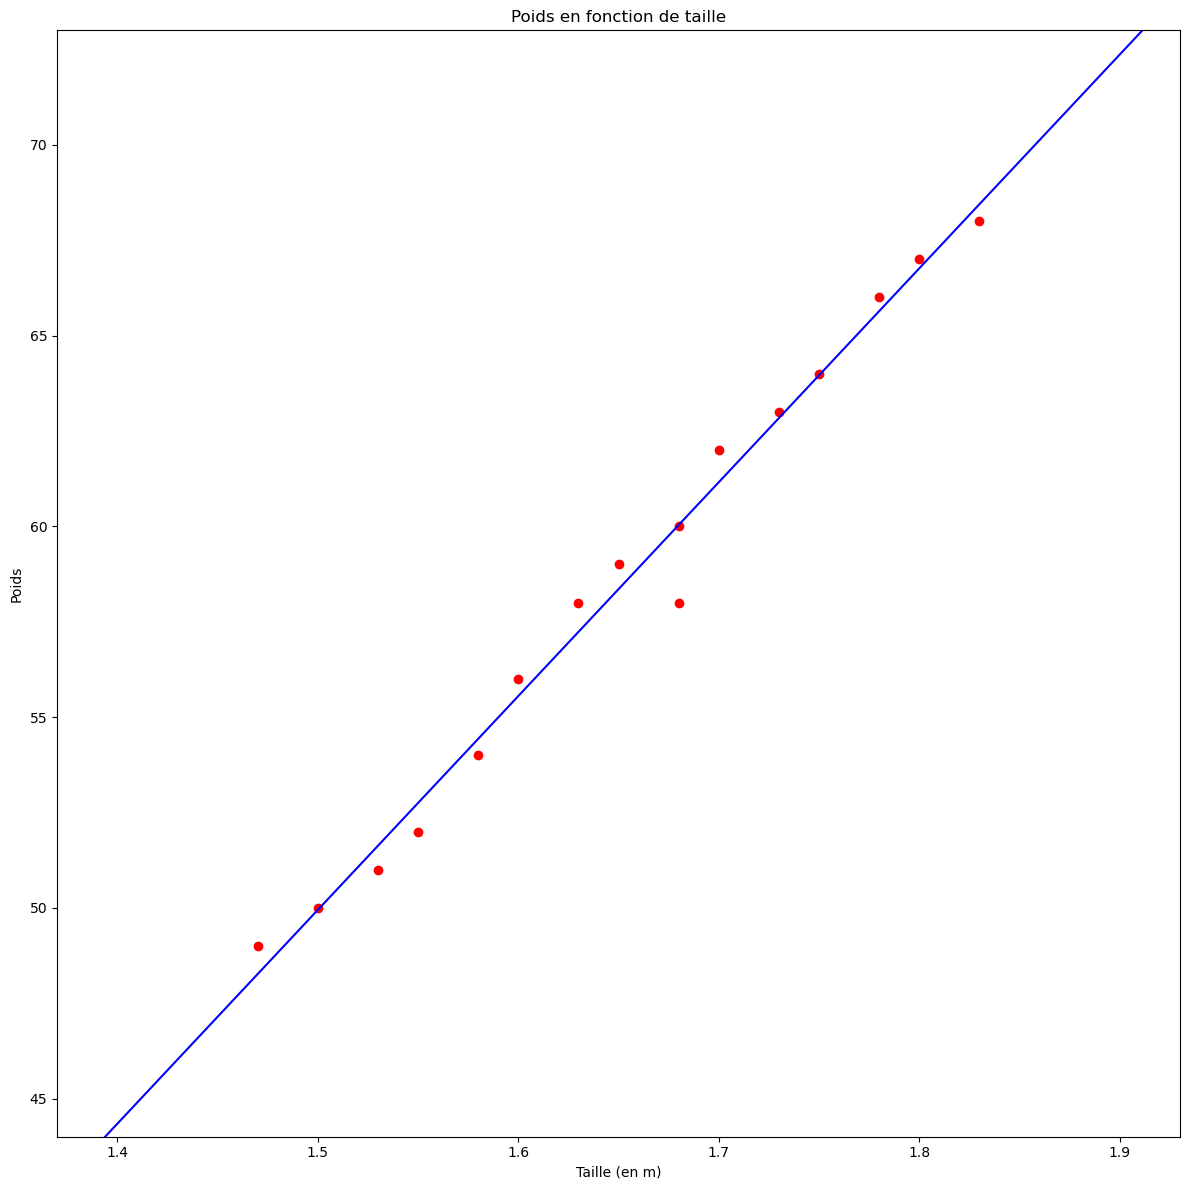

In [86]:
plotDroite(x,y,ast,bst)

## Moindre valeur absolue (norme $L_1$)

LA méthode des moindre carrés donne des résultats tout à fait pertinents et satisfaisant, cependant elle n'est pas la plus naturelle.

En effet, la fonction d'erreur qui vient en premier à l'esprit est $$E_1 (a,b) = \sum_i |y_ i - (aX_i + b)|$$.


En pratique, ce n'est pas elle que l'on choisit car la minimiser est plus difficile (théoriquement et en temps machine). Cependant on peut trouver _par programmation linéaire_ les paramètres optimaux pour ce problème, et comparer la droite ainsi obtenue à celle des moindre carrée.

Partons de 
$$E_1 (a,b) = \sum_i |y_ i - (aX_i + b)|$$

On écrit $e_i = |y_ i - (aX_i + b)|$, le problème devient alors


$\text{ Minimiser} \sum_i e_i $

sous contraintes 
$\begin{cases}e_i  = |y_ i - (aX_i + b)|\end{cases}$

<br>
<br>

Que l'on réécrit encore 

$\text{ Minimiser} \sum_i e_i $


sous contraintes 

$\begin{cases}e_i  &\leq y_ i - (aX_i + b)\\
e_i  &\geq - (y_ i - (aX_i + b))
\end{cases}$


soit

$\begin{cases}e_i  &\leq y_ i - (aX_i + b)\\
-e_i  &\leq (y_ i - (aX_i + b))
\end{cases}$

que l'on peut mettre en forme plus proche d'un problème linéaire 

sous contraintes 
$\text{ Maximiser} -\sum_i e_i $
sous contraintes 

$\begin{cases}
aX_i  + b   + e_i  &\leq y_ i)\\
-aX_i - b - e_i  &\leq -y_ i
\end{cases}$


>**_question_**<br>
Mettre ce problème sous la forme matricielle :

$\text{ Maximiser} $

$c_{lp} [a,b,e_1, ... e_n] $

Sous contraintes 
$
\begin{cases}
A_{lp} [a,b,e_1, ... e_n] &=b_{lp}\\
\end{cases}$

33.333333333333336 0.0


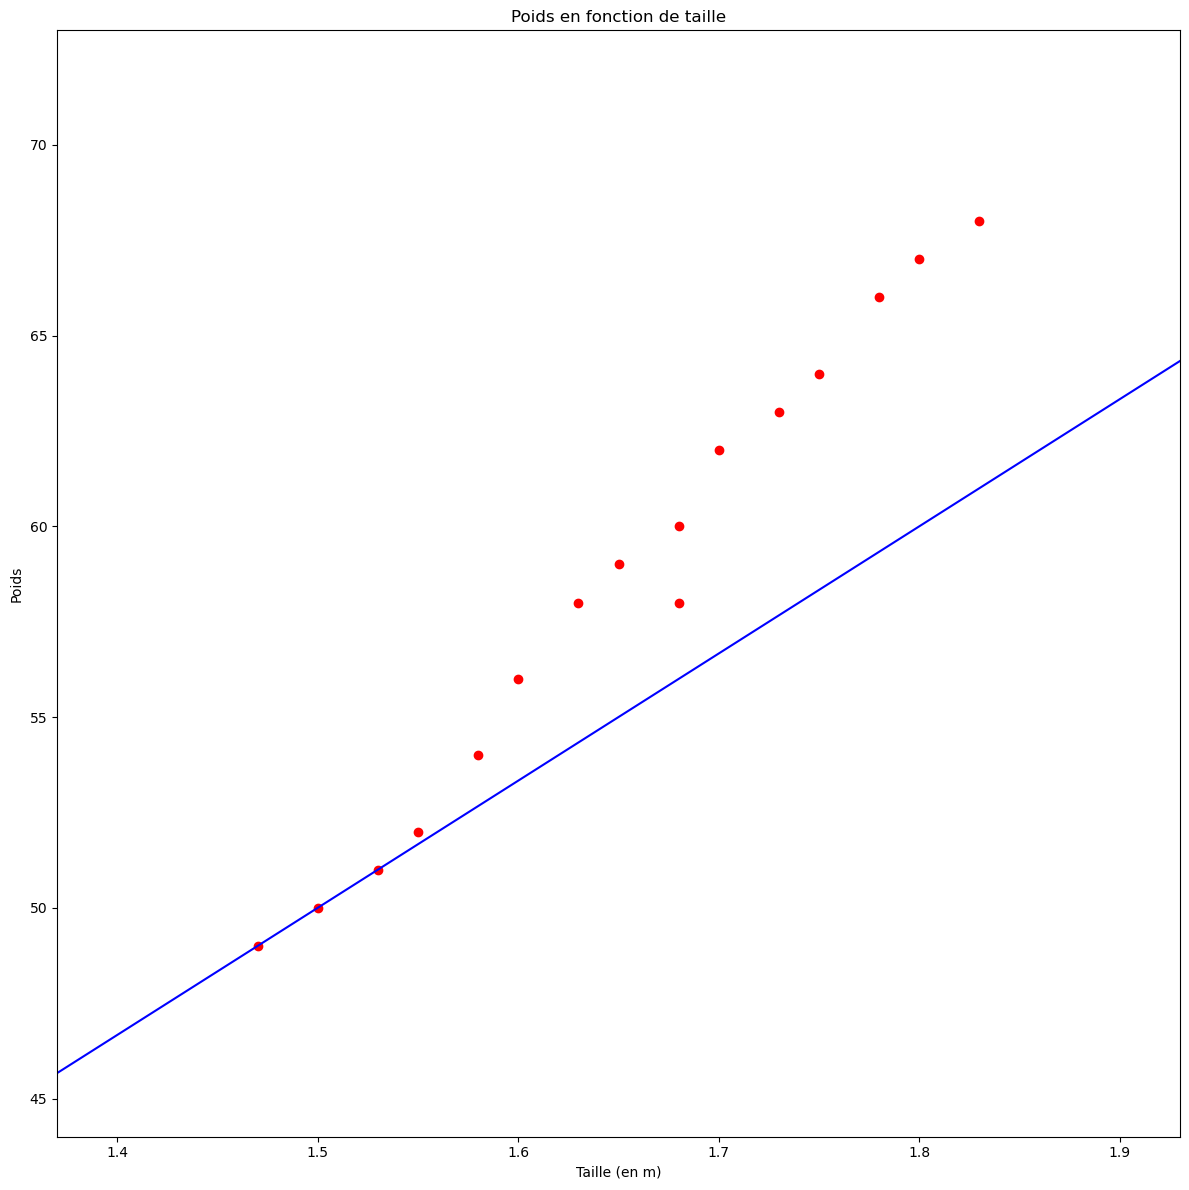

In [89]:
a,b = linsol.x[:2]

print(a,b)
plotDroite(x,y,a,b)

Tiens, ça ne semble pas marcher ?

Le problème vient des contraintes (implicites) sur $b$ : scicpy suppose par défaut que l'on souhaite que toutes lesc variables soient positives.
Cela peut se régler via l'option `bounds`

>_**question**_ régler ce problème via l'option `bounds`


In [92]:
bounds = [(None, None)] * 2 + [(0, None)] * n 


46.66666666666669 -20.400000000000034


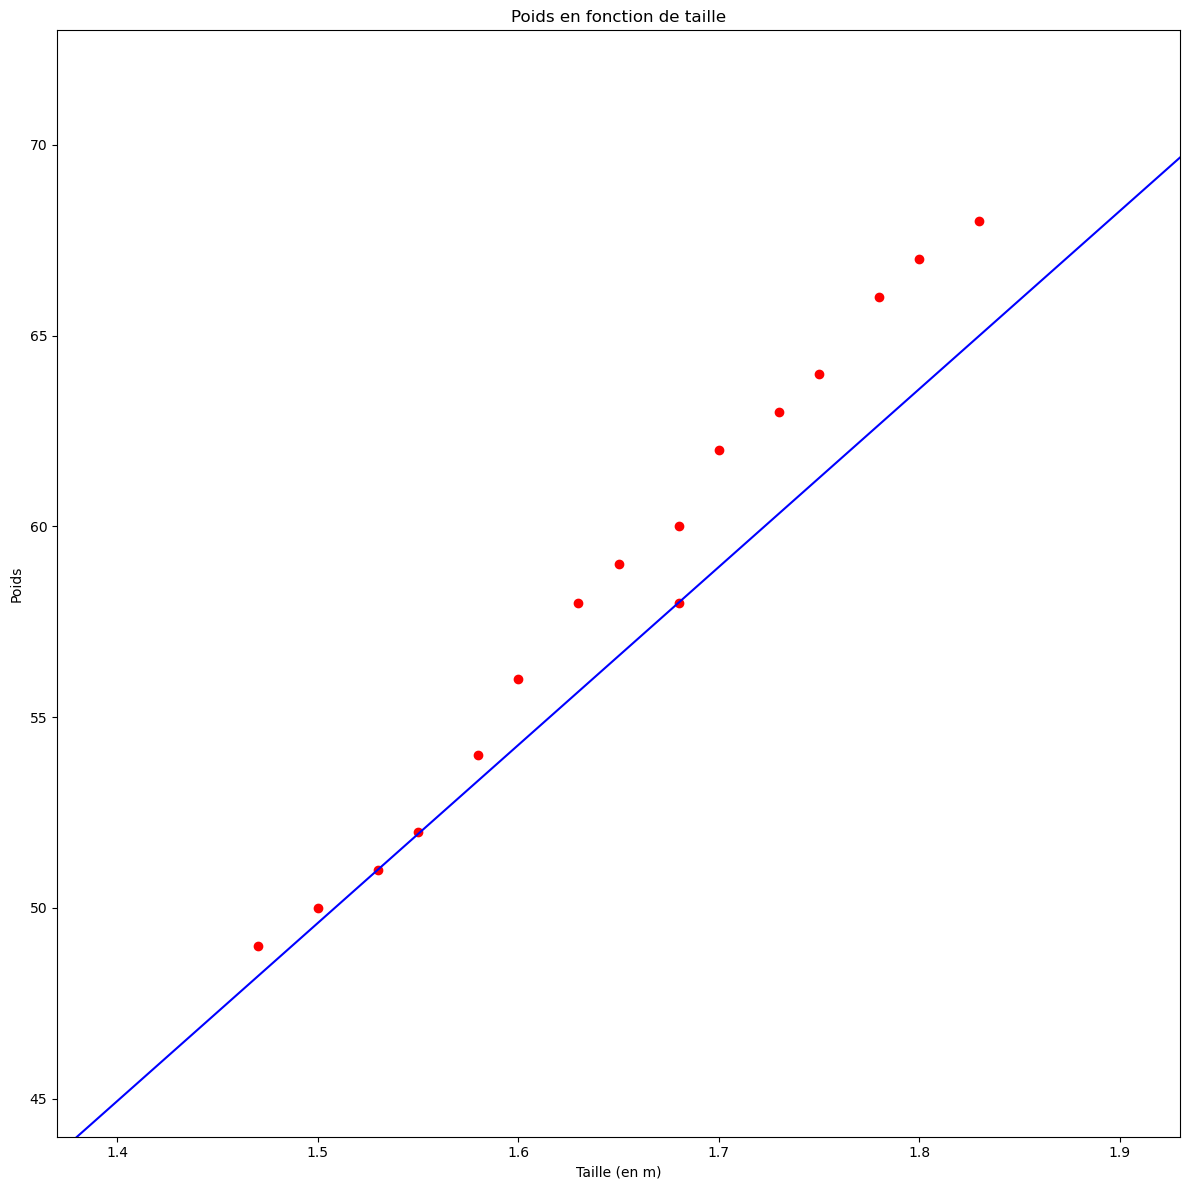

In [91]:

print(a,b)
plotDroite(x,y,a,b)

### Pour aller plus loin :

Écrire une fonction qui trace simultanément les deux droites de regression.

À l'aide de wigdets, observer les effets des outliners sur les deux droites.

----------------------------------

## Flots
### rappels (de la semaine prochaine !)


$G = (S, A)$ est un graphe orienté avec  une fonction de _capacité_ $c : S\times S \to \mathbb{N}$ tel que

- $\forall (u, v) \in A$, $c(u, v) > 0$

- $\forall (u, v) \notin A$, $c(u, v) = 0$


Dans ce graphe on distingue 2 sommets particuliers
- $s$ : source ($d^- = 0$, pas d'arêtes entrantes)
- $t$ : puits ($d^+ = 0$, pas d'arêtes sortantes)

Sur un tel graphe, un _flot_ est  est une fonction $f : S^2 \to \mathbb{R}$ tq

- **Contraintes de capacité** : $f(u,v) \le c(u,v)$ (la quantité de flot sur un arc ne dépasse pas la capacité de cet arc)

- **Anti-symétrie** $f(u,v) = - f(v,u)$

- **Conservation du flot** $\sum_{w \in S} f(u,w) = 0$ , sauf si $u=s$ ou $u=t$ (sur chaque sommet sauf s et t, la somme des flots entrants est égale à la somme des flots sortants)

La _valeur_ totale du flot est $\sum_{(s,u) \in A} f(s, u) = \sum_{(v,t) \in A} f(v, t)$


Voici un exemple de graphe orienté avec capacité (la source et le puits sont en vert). L'illustration a été réalisée en utilisant la bibliothèque `networkx`:

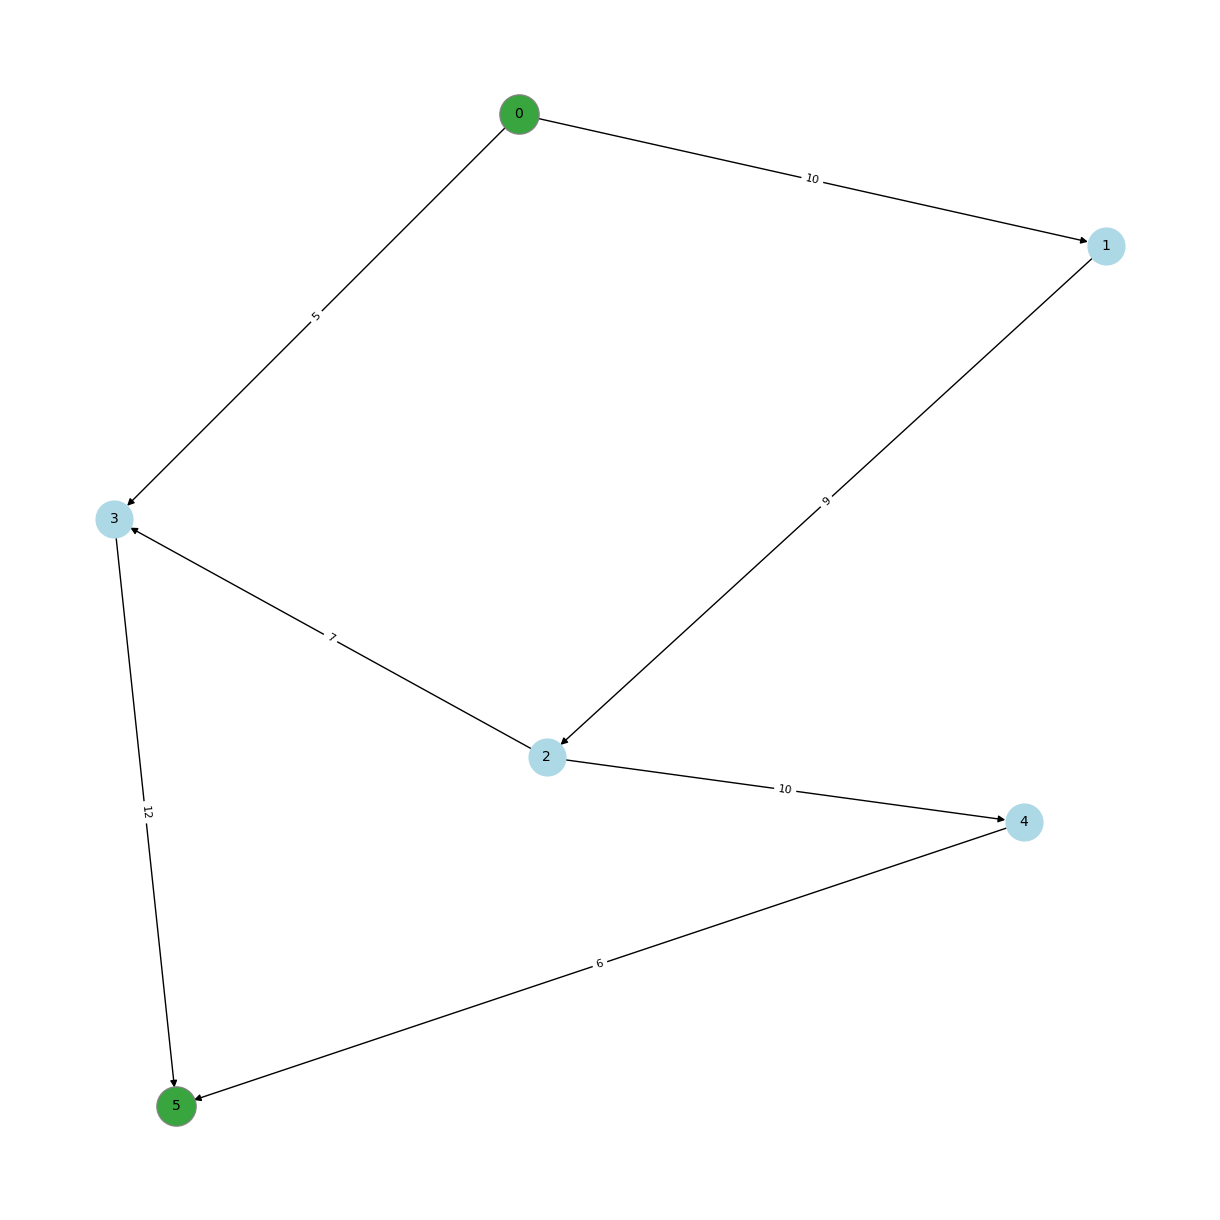

In [33]:
capacity_matrix = np.array([
    [0, 10, 0, 5, 0, 0],
    [0, 0, 9, 0, 0, 0],
    [0, 0, 0, 7, 10, 0],
    [0, 0, 0, 0, 0, 12],
    [0, 0, 0, 0, 0, 6],
    [0, 0, 0, 0, 0, 0]
])

source = 0
puits = 5

# Create a directed graph from the capacity matrix
G = nx.DiGraph()
for i in range(len(capacity_matrix)):
    for j in range(len(capacity_matrix[0])):
        if capacity_matrix[i][j] > 0:
            G.add_edge(i, j, capacity=capacity_matrix[i][j])
            
for u, v, data in G.edges(data=True):
    capacity = data['capacity']
    
# Draw the graph with edge labels
pos = nx.spring_layout(G)
labels = {edge: f"{G.edges[edge]['capacity']}" for edge in G.edges}
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black')
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=[source, puits], node_color="tab:green", **options)
#nx.draw_networkx_edges(G, pos, edge_color='edge_colors', width=3, edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.show()

# Flot : contraintes linéaires

La formulation

>- **Contraintes de capacité** : $f(u,v) \le c(u,v)$ (la quantité de flot sur un arc ne dépasse pas la capacité >de cet arc)
>
>- **Anti-symétrie** $f(u,v) = - f(v,u)$
>
>- **Conservation du flot** $\sum_{w \in S} f(u,w) = 0$ , sauf si $u=s$ ou $u=t$ (sur chaque sommet sauf s et t, >la somme des flots entrants est égale à la somme des flots sortants)

>La _valeur_ totale du flot est $\sum_{(s,u) \in A} f(s, u) = \sum_{(v,t) \in A} f(v, t)$

ressemble fortement à un problème d'optimisation linéaire. On peut le reformuler comme :


**Maximiser**  $\sum_{(s,u) \in A} f(s, u)$

**sous les contraintes**

$f(u,v) \le c(u,v), \quad \forall (u,v) \in A$
$f(u,v) \ge 0, \quad \forall (u,v) \in A$
$\sum_{x \text{ voisin sortant de } u } f(u,x) - \sum_{y \text{ voisin entrant de } u} f(y, u) = 0$
$\sum_{w \in S} f(u,w) = 0$ 



Les variables sont donc les valeurs du flow sur chaque arête.

On va construire :

- une matrice $A_{cons}$ qui garantira la conservation du flot
- un vecteur $b_{cons}$, égal à $0$ sur toutes ses coordonnées
- une matrice $A_{capa}$, égale à la matrice identité
- un vecteur $b_{capa}$ qui contiendra les capacités de chaque arête
- un vecteur de coût $c$ qui vaut $1$ sur les arêtes sortant de $s$



plus précisément la matrice $A_{cons}$ sera une matrice a (nombre de sommets -2 [la source et le puits]) lignes et (nombre d'arêtes) colonnes (il s'agit en fait de la matrice d'incidence où l'on a retiré les lignes de la source et du puits)


>**_question_**<br>
Écrire les matrices et vecteurs correspondant au problème d'optimisation linéaire associé à un graphe de capacité $G$ (donné comme une matrice de capacité).<br>


$
\text{Maximiser } c^T . f \\ \text{ sous contraintes }
\begin{cases}
A_{cons} . f &= b_{cons} \\ 
A_{capa} . f &\leq b_{capa}
\end{cases}$




In [20]:
#https://cs.au.dk/~gerth/ipsa18/slides/linear_programming.pdf

def toIncidence(M):
    n = M.shape[0]
    m = sum(sum(M.astype(bool)))
    I = np.zeros((n,m),int)
    capa = np.zeros(m) 
    cpt=0
    for i in range(n):
        for j in range(n):
            if M[i,j]!=0 : 
                I[i,cpt] = -1
                I[j,cpt] = 1
                capa[cpt] = M[i,j]
                cpt = cpt + 1
    print(cpt)           
    return I,capa


def linearFlow(M):
    

    
    return Acons, bcons, Acapa, bcapa, c



[[False  True False  True False False]
 [False False  True False False False]
 [False False False  True  True False]
 [False False False False False  True]
 [False False False False False  True]
 [False False False False False False]]
7
(array([[-1, -1,  0,  0,  0,  0,  0],
       [ 1,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  1, -1, -1,  0,  0],
       [ 0,  1,  0,  1,  0, -1,  0],
       [ 0,  0,  0,  0,  1,  0, -1],
       [ 0,  0,  0,  0,  0,  1,  1]]), array([10.,  5.,  9.,  7., 10., 12.,  6.]))
7
(array([[ 1,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  1, -1, -1,  0,  0],
       [ 0,  1,  0,  1,  0, -1,  0],
       [ 0,  0,  0,  0,  1,  0, -1]]), array([0., 0., 0., 0.]), array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]]), array([10.,  5.,  9.,  7., 10., 12.,  6.]), array([1, 1





>_**question**_ <br> En utilisant Scipy, retrouvez les résultats du TP de modélisation. Les illustrer et les comparer au résultat trouvés en modélisation. 



In [22]:
Acons, bcons, Acapa, bcapa, c  = linearFlow(capacity_matrix)



7
7
(4, 7)
(4,)
(7, 7)
(7,)
(7,)


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -14.0
              x: [ 9.000e+00  5.000e+00  9.000e+00  3.000e+00  6.000e+00
                   8.000e+00  6.000e+00]
            nit: 0
          lower:  residual: [ 9.000e+00  5.000e+00  9.000e+00  3.000e+00
                              6.000e+00  8.000e+00  6.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
                 marginals: [-1.000e+00 -0.000e+00 -0.000e+00 -0.000e+00]
        ineqlin:  residual: [ 